<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [41]:
import pandas as pd
import scipy
import spacy 
from pprint import pprint

In [4]:
data_path = '../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'
data = pd.read_csv(data_path)

In [6]:
df = pd.DataFrame(data)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


## Clean and lemmatize text

In [9]:
nlp = spacy.load("en_core_web_md")

In [10]:
docs = []
for doc in nlp.pipe(df['reviews.text'], disable=['parser', 'tagger']):
    tokens = []
    for token in doc:
        if (token.is_punct == False) and (token.is_stop == False) \
        and (token.is_digit == False) and (token.is_space == False) \
        and (token.pos_ != 'PRON'):
            tokens.append(token.lemma_.lower())
    docs.append(tokens)

In [11]:
df['lemmas'] = docs

## Create LDA model

In [31]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pprint

In [48]:
print(df['primaryCategories'].value_counts())
'{}, topics'.format(len(df['primaryCategories'].value_counts()))

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64


'9, topics'

In [50]:
print(df['reviews.rating'].value_counts())
'{}, topics'.format(len(df['reviews.rating'].value_counts()))

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64


'5, topics'

In [18]:
id2word = corpora.Dictionary(df['lemmas'])

In [20]:
len(id2word.keys())

8819

In [21]:
# lets remove extrme values
id2word.filter_extremes(no_below=2, no_above=0.35)

In [22]:
len(id2word)

5816

In [24]:
# dtm
corpus = [id2word.doc2bow(doc) for doc in df['lemmas']]

In [27]:
[(id2word[word_id], word_count) for word_id, word_count in corpus[6]]

[('battery', 1),
 ('order', 1),
 ('have', 1),
 ('past', 1),
 ('please', 1),
 ('problame', 1)]

In [52]:
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=9, 
                                        passes=10,
                                        chunksize=100, 
                                        per_word_topics=True,
                                        workers=12)

In [53]:
lda_multicore.save('lda_multicore.model')

In [54]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

## Interpretate the result 

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pyLDAvis
import pyLDAvis.gensim 

/Users/anastasialysenko/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
pprint(lda_multicore.print_topics())

[(0,
  '0.117*"battery" + 0.063*"great" + 0.048*"price" + 0.040*"long" + '
  '0.036*"work" + 0.029*"brand" + 0.022*"watch" + 0.022*"buy" + 0.020*"amazon" '
  '+ 0.016*"good"'),
 (1,
  '0.101*"tablet" + 0.076*"app" + 0.071*"kid" + 0.061*"great" + 0.031*"game" + '
  '0.030*"play" + 0.025*"amazon" + 0.020*"perfect" + 0.018*"download" + '
  '0.016*"enjoy"'),
 (2,
  '0.083*"screen" + 0.055*"read" + 0.039*"light" + 0.034*"size" + 0.026*"nice" '
  '+ 0.023*"access" + 0.018*"easy" + 0.016*"book" + 0.015*"small" + '
  '0.014*"device"'),
 (3,
  '0.137*"love" + 0.065*"gift" + 0.061*"buy" + 0.055*"great" + '
  '0.049*"christmas" + 0.030*"daughter" + 0.025*"product" + '
  '0.024*"granddaughter" + 0.021*"purchase" + 0.018*"got"'),
 (4,
  '0.060*"easy" + 0.057*"use" + 0.050*"tablet" + 0.048*"kindle" + 0.046*"fire" '
  '+ 0.041*"great" + 0.035*"love" + 0.015*"hd" + 0.014*"ipad" + '
  '0.013*"amazon"'),
 (5,
  '0.027*"use" + 0.023*"camera" + 0.017*"$" + 0.016*"netflix" + 0.016*"black" '
  '+ 0.016*"vid

In [56]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [57]:
doc_lda = lda_multicore[corpus]
doc_lda[1][0]

[(0, 0.8517588),
 (1, 0.018524788),
 (2, 0.01852461),
 (3, 0.018535648),
 (4, 0.018527666),
 (5, 0.018524319),
 (6, 0.018522892),
 (7, 0.018525684),
 (8, 0.018555658)]

In [58]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [59]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=2, limit=22, step=4)

CPU times: user 1min 15s, sys: 11.2 s, total: 1min 27s
Wall time: 1min 40s


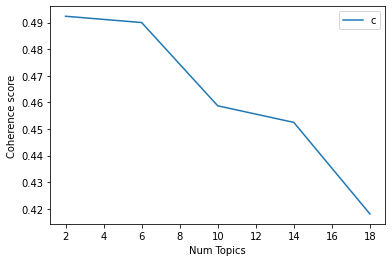

In [65]:
limit=22; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

/Users/anastasialysenko/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.120688  0.138279       1        1  24.200472
0      0.161642 -0.109809       2        1  20.518886
4     -0.039981  0.163079       3        1  10.839137
1      0.055899  0.192781       4        1   9.733255
2     -0.248772 -0.075799       5        1   7.551736
6     -0.114531 -0.172029       6        1   7.082933
8      0.265412 -0.175220       7        1   7.049088
5     -0.096772 -0.139806       8        1   6.781211
3      0.137790  0.178524       9        1   6.243281, topic_info=         Term         Freq        Total Category  logprob  loglift
33       good  5684.000000  5684.000000  Default  30.0000  30.0000
3     battery  8173.000000  8173.000000  Default  29.0000  29.0000
82       love  6145.000000  6145.000000  Default  28.0000  28.0000
2901   tablet  7795.000000  7795.000000  Default  27.0000  27.0000
20      great  9255.000000  9255.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
887      help   126.675832   319.551402   Topic9  -5.0601   1.8484
41     please   116.060334   328.551047   Topic9  -5.1476   1.7331
71        get   210.270916  1507.917843   Topic9  -4.5533   0.8036
173       kid   257.106694  2725.615408   Topic9  -4.3522   0.4127
17      price   267.015428  5392.012908   Topic9  -4.3144  -0.2317

[562 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3633      1  0.013316        $
3633      3  0.264417        $
3633      8  0.720966        $
3609      3  0.976501      1st
54        2  0.996627       aa
...     ...       ...      ...
979       9  0.004118    young
2514      1  0.376034  youtube
2514      8  0.621501  youtube
1275      3  0.376806       yr
1275      4  0.620160       yr

[1080 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 5, 2, 3, 7, 9, 6, 4])

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling